# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Dimas Yustisia
- **Email:** mdyustisia@gmail.com
- **ID Dicoding:** <a href="https://www.dicoding.com/users/javanez/">javanez</a>

## Menentukan Pertanyaan Bisnis

- Pada musim apakah sepeda memiliki banyak pengguna?
- Berapa banyak pengguna sepeda dalam bulanan pada tahun 2011 dan 2012?
- Bagaimana suhu memengaruhi total penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

In [13]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Assessing `day_df`

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [17]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [18]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())

Jumlah Duplikasi:  0


In [19]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Cleaning Data

#### Menyesuaikan value pada season di setiap dataframa dimana value diubah berdasarkan `readme.txt`
(1:spring, 2:summer, 3:fall, 4:winter)

In [22]:
season = ['spring', 'summer', 'fall', 'winter']

In [23]:
day_df['season'].replace([1,2,3,4], season, inplace=True)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Mengubah tipe data pada `day_df`

In [25]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [26]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore `day_df`

##### Eksplor jumlah pengguna berdasarkan musim

In [30]:
day_df.groupby('season').cnt.sum().sort_values(ascending=False)

season
fall      1061129
summer     918589
winter     841613
spring     471348
Name: cnt, dtype: int64

##### Eksplor jumlah pengguna berdasarkan suhu yang dinormalisasikan

In [32]:
day_df.groupby('temp').cnt.sum().sort_values(ascending=False)

temp
0.564167    26439
0.635000    26012
0.649167    24216
0.514167    22963
0.710833    22806
            ...  
0.216667      683
0.389091      623
0.376522      605
0.195000      431
0.440000       22
Name: cnt, Length: 499, dtype: int64

##### Eksplor jumlah pengguna berdasarkan bulan

In [34]:
day_df.groupby('mnth').cnt.sum()

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

##### Membuat dataframe jumlah pengguna berdasarkan musim

In [38]:
seasonal_users = day_df.groupby("season").cnt.sum().sort_values(ascending=False).reset_index()
seasonal_users.rename(columns={
    "cnt": "user_count"
}, inplace=True)
seasonal_users

,season,user_count
0,fall,1061129
1,summer,918589
2,winter,841613
3,spring,471348


##### Membuat bar chart berdasarkan dataframe yang telah digunakan

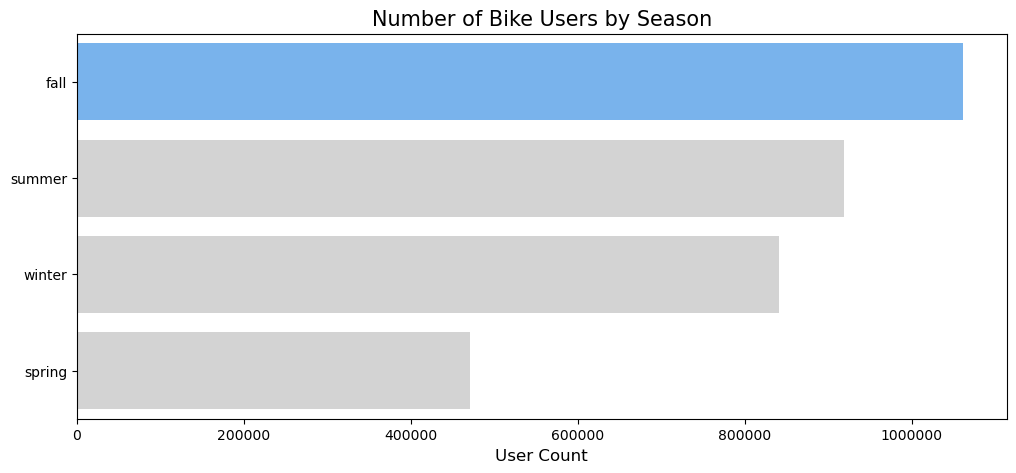

In [40]:
plt.figure(figsize=(12, 5))
colors = ["#66B3FF", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="user_count",
    y="season",
    data=seasonal_users,
    palette=colors
)

plt.title("Number of Bike Users by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel('User Count', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

### Pertanyaan 2:

##### Membuat dataframe berdasarkan jumlah pengguna bulanan

In [43]:
day_df['month'] = day_df['dteday'].dt.strftime('%b')
day_df['year'] = day_df['dteday'].dt.year

monthly_users_df = day_df.groupby(['year', 'month']).agg({'cnt': 'sum'}).reset_index()
monthly_users_df.rename(columns={'cnt': 'user_count'}, inplace=True)

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] #List bulan untuk dikategorikan

monthly_users_df['month'] = pd.Categorical(monthly_users_df['month'], categories=month_order, ordered=True)
monthly_users_df = monthly_users_df.sort_values(['year', 'month'])

monthly_users_df.head()

,year,month,user_count
4,2011,Jan,38189
3,2011,Feb,48215
7,2011,Mar,64045
0,2011,Apr,94870
8,2011,May,135821


##### Membuat line chart bulanan untuk tahun 2011 dan 2012

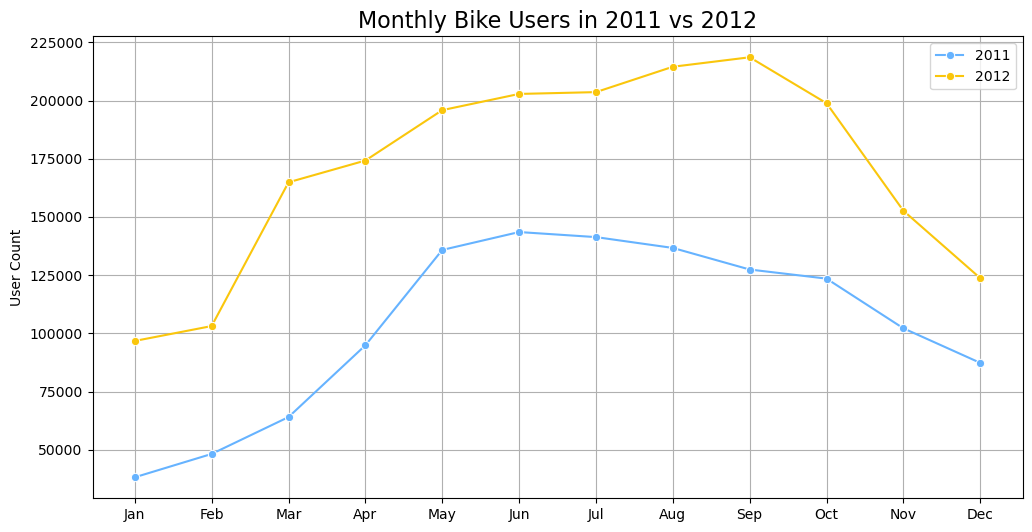

In [45]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=monthly_users_df[monthly_users_df['year'] == 2011], x='month', y='user_count', marker='o', label='2011', color='#66B3FF')
sns.lineplot(data=monthly_users_df[monthly_users_df['year'] == 2012], x='month', y='user_count', marker='o', label='2012', color='#FAC60C')

plt.title('Monthly Bike Users in 2011 vs 2012', fontsize=16)
plt.xlabel(None)
plt.ylabel('User Count')
plt.grid(True)
plt.legend()

plt.show()


### Pertanyaan 3:

##### Membuat dataframe berdasarkan temperatur, jumlah pengguna, dan musim

In [48]:
temp_count_df = day_df.iloc[:, [2, 9, 15]]
temp_count_df

,season,temp,cnt
0,spring,0.344167,985
1,spring,0.363478,801
2,spring,0.196364,1349
3,spring,0.200000,1562
4,spring,0.226957,1600
...,...,...,...
726,spring,0.254167,2114
727,spring,0.253333,3095
728,spring,0.253333,1341
729,spring,0.255833,1796


##### Memplotting data `temp_count_df` menjadi scatter plot

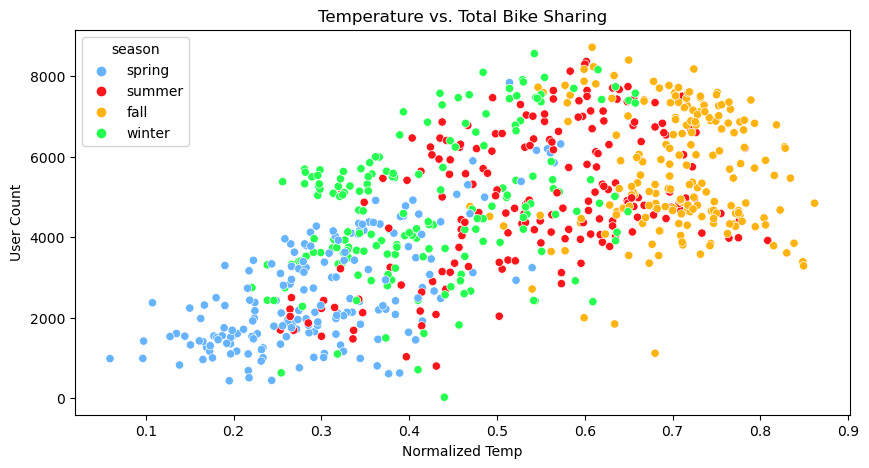

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))
colors_ = ['#66B3FF', '#FD151B', '#FFB30F', '#25FF50']


sns.scatterplot(data=temp_count_df, x='temp', y='cnt', hue='season', palette=colors_, ax=ax)
ax.set_title('Temperature vs. Total Bike Sharing')
ax.set_xlabel('Normalized Temp')
ax.set_ylabel('User Count')
plt.show()

## Conclusion

- Bar chart menggambarkan total pengguna menurut musim menunjukkan bahwa season `fall` memiliki total penyewaan sepeda tertinggi, diikuti oleh `summer`. Lalu `winter` menunjukkan penurunan penggunaan dan `spring` memiliki pengguna paling sedikit.

- Line chart menunjukkan jumlah pengguna sepeda per bulan sepanjang tahun 2011 dan 2012 menunjukkan tren musiman yang jelas dalam penyewaan sepeda. Ada peningkatan signifikan dalam jumlah pengguna pada bulan yang memiliki temperatur hangat (Mei hingga September), dan mencapai puncaknya pada bulan Juni. Hal ini menunjukkan bahwa kondisi cuaca yang bagus mempengaruhi penggunaan sepeda secara positif.

- Scatter plot menggambarkan hubungan antara temperatur yang dinormalisasi dan total penyewaan sepeda `cnt` di semua musim. Hal ini menunjukkan korelasi positif di mana suhu yang lebih tinggi menyebabkan peningkatan penyewaan sepeda. Ini berarti bahwa cuaca yang mendukung dapat mendorong penggunaan sepeda.